In [2]:
# !pip install networkx

In [3]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas as pd

# Undirect 9 node graph labeled 0-8
edge_list = [(0,2), (0,1), (0,3), (2,4), (5,6), (7,4), (0,6), (5,3), (3,7), (0,8)]

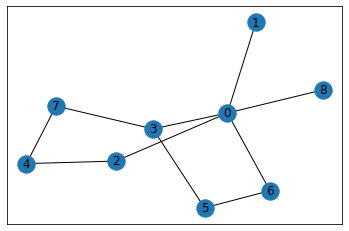

In [5]:
# Goal node is to always get to node 7 the fastest
goal = 7

G = nx.Graph()
G.add_edges_from(edge_list)
position = nx.spring_layout(G)

nx.draw_networkx_nodes(G, position)
nx.draw_networkx_edges(G, position)
nx.draw_networkx_labels(G, position)
plt.show()

In [7]:
SIZE_MATRIX = 9

In [10]:
# Set up immediate rewards matrix
R = np.matrix(np.ones(shape=(SIZE_MATRIX, SIZE_MATRIX)))

# Set initial rewards to -1
R *= -1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [11]:
# Set the reward for any edge which leads to the goal of 7 to 100
for edge in edge_list:
    print(edge)
    # If edge leads to 7, reward is 100
    if edge[1] == goal:
        R[edge] = 100
    else:
        R[edge] = 0
    # Undirected so if we're at 7 then set 100 as reward
    if edge[0] == goal:
        R[edge[::-1]] = 100
    else:
        R[edge[::-1]] = 0

(0, 2)
(0, 1)
(0, 3)
(2, 4)
(5, 6)
(7, 4)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [12]:
# Once in goal state, want to make sure we remain there
R[goal, goal] = 100

# Initialized Matrix
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [167]:
# Discount factor
gamma = 0.8

# Set Q-Table
Q = np.matrix(np.zeros(shape=[SIZE_MATRIX, SIZE_MATRIX]))
pd.DataFrame(Q)
# x = pd.DataFrame(Q)
# x.iloc[6,3]= 3
# x

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
# Row 7 of rewards matrix has 3 node that we can access; 3,4,7.
# Thus nodes 3, 4, and 7 are states we can explore
# np.where(R[7,:] >= 0)[1]
# R[7,]

def get_available_actions(state):
    current_state_row = R[state,] # Row[7,] = matrix([[ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.]])
    available_actions = np.where(current_state_row >= 0)[1] # array([3, 4, 7])
    return available_actions

def sample_next_action(available_actions):
    # Randomly choose any available action; 3,4,7.
    next_action = int(np.random.choice(available_actions, size=1))
    return next_action

def update(current_state, action, gamma):
    
    # Find index of action which has highest Q-Value
    max_index = np.where(Q[action,]==np.max(Q[action,]))[1]
    # Which nodes can this exploratory node even get to?
#     max_index = get_available_actions(action)
    print(f'Max Actions to explore from node {action}: {max_index}')
    
    # If more than one index has max Q-Value, choose at random
    if max_index.shape[0]>1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    
    print('Chosen Node/Action to explore:', max_index)
    print(f"Immediate Edge: {[current_state, action]}. Future Edge/State to explore for Q-Learning: {[action, max_index]}")
        
    # Grab next state max action-value combination that's currently estimated for that Q-Value
    max_value = Q[action, max_index]
    print(f'Future Edge/State Q-Value Index {[action, max_index]} has value: {max_value}')
    
    # Now can populate new Q-Value for state-action combination: Immediate Reward + Discounted Reward for next state
    print(f"Current Reward for starting state-action pair index {[current_state, action]}: {R[current_state, action]}")
    print(f"Future discounted reward for next state at Q-Table index {[action, max_index]}: {gamma * max_value}")
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print(f"Updated Q-Value at index {[current_state, action]} with value: {R[current_state, action] + gamma * max_value}")

In [170]:
# Lets start at Node 0
initial_state = 0
print(f"Initial Node/State: {initial_state}")

available_actions = get_available_actions(initial_state)
print(f"Nodes to Choose from: {available_actions}") # Can get to node 1, 2, 3, 6, or 8

action = sample_next_action(available_actions)
print(f"Randomly selected node: {action}") # randomly selected node 1

update(initial_state, action, gamma)

Initial Node/State: 0
Nodes to Choose from: [1 2 3 6 8]
Randomly selected node: 6
Max Actions to explore from node 6: [0 1 2 3 4 5 6 7 8]
Chosen Node/Action to explore: 1
Immediate Edge: [0, 6]. Future Edge/State to explore for Q-Learning: [6, 1]
Future Edge/State Q-Value Index [6, 1] has value: 0.0
Current Reward for starting state-action pair index [0, 6]: 0.0
Future discounted reward for next state at Q-Table index [6, 1]: 0.0
Updated Q-Value at index [0, 6] with value: 0.0


In [158]:
# Run Q-Value iteration algorithm for 700 iterations
for i in range(700):
    
    # For each iteration start off in some random state; remember rows are states in Q-Table
    current_state = np.random.randint(0, int(Q.shape[0]))
    print(f"Starting Current State Node: {current_state}")
    
    # Find potential nodes to move to
    available_action = get_available_actions(current_state)
    print(f"We can try these nodes: {available_action}")
    
    # Pick a potential node randomly
    action = sample_next_action(available_action)
    print(f"Randomly selected node: {action}")
    
    # Update Q-Table for current state-action transition
    update(current_state, action, gamma)
    print('\n')

Starting Current State Node: 1
We can try these nodes: [0]
Randomly selected node: 0
Max Actions to explore from node 0: [3]
Chosen Node/Action to explore: 3
Immediate Edge: [1, 0]. Future Edge/State to explore for Q-Learning: [0, 3]
Future Edge/State Q-Value Index [0, 3] has value: 144.0
Current Reward for starting state-action pair index [1, 0]: 0.0
Future discounted reward for next state at Q-Table index [0, 3]: 115.2
Updated Q-Value at index [1, 0] with value: 115.2


Starting Current State Node: 5
We can try these nodes: [3 6]
Randomly selected node: 3
Max Actions to explore from node 3: [7]
Chosen Node/Action to explore: 7
Immediate Edge: [5, 3]. Future Edge/State to explore for Q-Learning: [3, 7]
Future Edge/State Q-Value Index [3, 7] has value: 281.1695741136873
Current Reward for starting state-action pair index [5, 3]: 0.0
Future discounted reward for next state at Q-Table index [3, 7]: 224.93565929094984
Updated Q-Value at index [5, 3] with value: 224.93565929094984


Starti

Max Actions to explore from node 3: [7]
Chosen Node/Action to explore: 7
Immediate Edge: [7, 3]. Future Edge/State to explore for Q-Learning: [3, 7]
Future Edge/State Q-Value Index [3, 7] has value: 387.95882194620793
Current Reward for starting state-action pair index [7, 3]: 0.0
Future discounted reward for next state at Q-Table index [3, 7]: 310.36705755696636
Updated Q-Value at index [7, 3] with value: 310.36705755696636


Starting Current State Node: 1
We can try these nodes: [0]
Randomly selected node: 0
Max Actions to explore from node 0: [3]
Chosen Node/Action to explore: 3
Immediate Edge: [1, 0]. Future Edge/State to explore for Q-Learning: [0, 3]
Future Edge/State Q-Value Index [0, 3] has value: 310.36705755696636
Current Reward for starting state-action pair index [1, 0]: 0.0
Future discounted reward for next state at Q-Table index [0, 3]: 248.2936460455731
Updated Q-Value at index [1, 0] with value: 248.2936460455731


Starting Current State Node: 3
We can try these nodes: 

Max Actions to explore from node 2: [4]
Chosen Node/Action to explore: 4
Immediate Edge: [4, 2]. Future Edge/State to explore for Q-Learning: [2, 4]
Future Edge/State Q-Value Index [2, 4] has value: 354.1079334691668
Current Reward for starting state-action pair index [4, 2]: 0.0
Future discounted reward for next state at Q-Table index [2, 4]: 283.28634677533347
Updated Q-Value at index [4, 2] with value: 283.28634677533347


Starting Current State Node: 3
We can try these nodes: [0 5 7]
Randomly selected node: 7
Max Actions to explore from node 7: [7]
Chosen Node/Action to explore: 7
Immediate Edge: [3, 7]. Future Edge/State to explore for Q-Learning: [7, 7]
Future Edge/State Q-Value Index [7, 7] has value: 470.6290774202668
Current Reward for starting state-action pair index [3, 7]: 100.0
Future discounted reward for next state at Q-Table index [7, 7]: 376.50326193621345
Updated Q-Value at index [3, 7] with value: 476.50326193621345


Starting Current State Node: 3
We can try these n

Randomly selected node: 0
Max Actions to explore from node 0: [3]
Chosen Node/Action to explore: 3
Immediate Edge: [1, 0]. Future Edge/State to explore for Q-Learning: [0, 3]
Future Edge/State Q-Value Index [0, 3] has value: 390.3757360890731
Current Reward for starting state-action pair index [1, 0]: 0.0
Future discounted reward for next state at Q-Table index [0, 3]: 312.30058887125847
Updated Q-Value at index [1, 0] with value: 312.30058887125847


Starting Current State Node: 0
We can try these nodes: [1 2 3 6 8]
Randomly selected node: 3
Max Actions to explore from node 3: [7]
Chosen Node/Action to explore: 7
Immediate Edge: [0, 3]. Future Edge/State to explore for Q-Learning: [3, 7]
Future Edge/State Q-Value Index [3, 7] has value: 487.9696701113413
Current Reward for starting state-action pair index [0, 3]: 0.0
Future discounted reward for next state at Q-Table index [3, 7]: 390.3757360890731
Updated Q-Value at index [0, 3] with value: 390.3757360890731


Starting Current State 

Randomly selected node: 2
Max Actions to explore from node 2: [4]
Chosen Node/Action to explore: 4
Immediate Edge: [0, 2]. Future Edge/State to explore for Q-Learning: [2, 4]
Future Edge/State Q-Value Index [2, 4] has value: 396.0579015020844
Current Reward for starting state-action pair index [0, 2]: 0.0
Future discounted reward for next state at Q-Table index [2, 4]: 316.84632120166754
Updated Q-Value at index [0, 2] with value: 316.84632120166754


Starting Current State Node: 5
We can try these nodes: [3 6]
Randomly selected node: 3
Max Actions to explore from node 3: [7]
Chosen Node/Action to explore: 7
Immediate Edge: [5, 3]. Future Edge/State to explore for Q-Learning: [3, 7]
Future Edge/State Q-Value Index [3, 7] has value: 495.07237687760545
Current Reward for starting state-action pair index [5, 3]: 0.0
Future discounted reward for next state at Q-Table index [3, 7]: 396.0579015020844
Updated Q-Value at index [5, 3] with value: 396.0579015020844


Starting Current State Node:

We can try these nodes: [3 4 7]
Randomly selected node: 7
Max Actions to explore from node 7: [7]
Chosen Node/Action to explore: 7
Immediate Edge: [7, 7]. Future Edge/State to explore for Q-Learning: [7, 7]
Future Edge/State Q-Value Index [7, 7] has value: 498.7082531642031
Current Reward for starting state-action pair index [7, 7]: 100.0
Future discounted reward for next state at Q-Table index [7, 7]: 398.96660253136247
Updated Q-Value at index [7, 7] with value: 498.96660253136247


Starting Current State Node: 6
We can try these nodes: [0 5]
Randomly selected node: 5
Max Actions to explore from node 5: [3]
Chosen Node/Action to explore: 3
Immediate Edge: [6, 5]. Future Edge/State to explore for Q-Learning: [5, 3]
Future Edge/State Q-Value Index [5, 3] has value: 399.17328202509
Current Reward for starting state-action pair index [6, 5]: 0.0
Future discounted reward for next state at Q-Table index [5, 3]: 319.338625620072
Updated Q-Value at index [6, 5] with value: 319.338625620072



In [159]:
print("Trained Q-Table:")
pd.DataFrame(Q)

Trained Q-Table:


,0,1,2,3,4,5,6,7,8
0,0.000000,255.338626,318.966603,399.470900,0.00000,0.00000,255.661376,0.000000,255.661376
1,319.576720,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000
2,319.173282,0.000000,0.000000,0.000000,399.57672,0.00000,0.000000,0.000000,0.000000
3,319.173282,0.000000,0.000000,0.000000,0.00000,319.47090,0.000000,499.338626,0.000000
4,0.000000,0.000000,319.470900,0.000000,0.00000,0.00000,0.000000,499.470900,0.000000
5,0.000000,0.000000,0.000000,399.470900,0.00000,0.00000,255.470900,0.000000,0.000000
6,319.173282,0.000000,0.000000,0.000000,0.00000,319.57672,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,399.338626,399.57672,0.00000,0.000000,499.338626,0.000000
8,319.576720,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000


In [160]:
print("Normalized Q matrix:")
pd.DataFrame(Q / np.max(Q) * 100)

Normalized Q matrix:


,0,1,2,3,4,5,6,7,8
0,0.000000,51.121822,63.860898,79.978814,0.0,0.000000,51.186441,0.000000,51.186441
1,63.983051,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,63.902278,0.000000,0.000000,0.000000,80.0,0.000000,0.000000,0.000000,0.000000
3,63.902278,0.000000,0.000000,0.000000,0.0,63.961864,0.000000,99.973517,0.000000
4,0.000000,0.000000,63.961864,0.000000,0.0,0.000000,0.000000,100.000000,0.000000
5,0.000000,0.000000,0.000000,79.978814,0.0,0.000000,51.148305,0.000000,0.000000
6,63.902278,0.000000,0.000000,0.000000,0.0,63.983051,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,79.952331,80.0,0.000000,0.000000,99.973517,0.000000
8,63.983051,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [165]:
# Find optimal route with populated Q-Table for node 0 to 7
current_state = 2
steps = [current_state]

while current_state != 7:
    # Find largest Q-Value in the row and select the column index that has it
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    # If all same value, pick one at random
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    
    # Once we have index for maximum Q-Value, append node to index
    steps.append(next_step_index)
    
    # Update current state to new node, keep going until node 7 is reached
    current_state = next_step_index
    
print("Most efficient path:")
steps

Most efficient path:


[2, 4, 7]

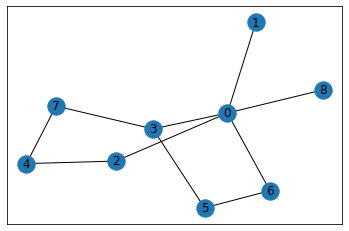

In [40]:
nx.draw_networkx_nodes(G, position)
nx.draw_networkx_edges(G, position)
nx.draw_networkx_labels(G, position)
plt.show()